In [156]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [157]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Analysis

In [158]:
# Connect SQLite.
dbconn = sqlite3.connect('../data/IowaLiquorSales.db')
cursor = dbconn.cursor()

# Pull Store database.
query = '''SELECT Sales.Date, Sales.ProductID, Sales.StoreID, Sales.VolumeSold_Liters, Sales.Sale_Dollars, Store.County, Store.lat, Store.lng, Store.active, Product.CategoryGroup
              FROM ((Sales 
              INNER JOIN Product ON Sales.ProductID=Product.ProductID)
              INNER JOIN Store ON Sales.StoreID=Store.StoreID)
              WHERE Sales.Date BETWEEN '2017-01-01' AND '2021-12-31';'''
cursor.execute(query)
result = cursor.fetchall()
cursor.close()
dbconn.close()

In [159]:
# Put the database in a data frame format.
temp = pd.DataFrame(result, columns = ['Date',
                                       'ProductID',
                                       'StoreID',
                                       'VolumeSold_Liters', 
                                       'Sale_Dollars', 
                                       'County', 
                                       'lat',
                                       'lng', 
                                       'active', 
                                       'CategoryGroup'])

In [160]:
temp.head()

,Date,ProductID,StoreID,VolumeSold_Liters,Sale_Dollars,County,lat,lng,active,CategoryGroup
0,2018-09-04,26826,4617,3.00,93.44,polk,41.60774,-93.57014,Active,whisky
1,2019-03-19,26826,2513,18.00,560.64,johnson,41.65143,-91.50105,Active,whisky
2,2019-05-15,86251,5068,12.00,43.56,dickinson,43.36136,-95.13954,Active,liqueur
3,2019-05-16,89566,2588,0.75,19.89,linn,41.97518,-91.60977,Active,tequila
4,2019-05-15,35926,2647,9.00,60.72,linn,41.93023,-91.71520,Active,vodka


In [161]:
temp.shape[0]

12263737

In [162]:
temp['Date'].min()

'2017-01-03'

In [163]:
temp['Date'].max()

'2021-12-31'

In [164]:
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Year'] = pd.to_datetime(temp['Date']).dt.year
temp['Month'] = pd.to_datetime(temp['Date']).dt.month

In [165]:
temp.head()

,Date,ProductID,StoreID,VolumeSold_Liters,Sale_Dollars,County,lat,lng,active,CategoryGroup,Year,Month
0,2018-09-04,26826,4617,3.00,93.44,polk,41.60774,-93.57014,Active,whisky,2018,9
1,2019-03-19,26826,2513,18.00,560.64,johnson,41.65143,-91.50105,Active,whisky,2019,3
2,2019-05-15,86251,5068,12.00,43.56,dickinson,43.36136,-95.13954,Active,liqueur,2019,5
3,2019-05-16,89566,2588,0.75,19.89,linn,41.97518,-91.60977,Active,tequila,2019,5
4,2019-05-15,35926,2647,9.00,60.72,linn,41.93023,-91.71520,Active,vodka,2019,5


In [166]:
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Year,
2017,3.145054e+08
2018,3.342163e+08
2019,3.492202e+08
2020,3.966631e+08
2021,4.281212e+08


In [167]:
temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'})

,Sale_Dollars
Month,
1,28665135.64
2,29617805.95
3,36653388.86
4,34734584.33
5,33659554.94
6,38890929.25
7,35176467.62
8,36501798.74
9,35837061.02


(1000.0, 2050.0)

<Figure size 864x720 with 0 Axes>

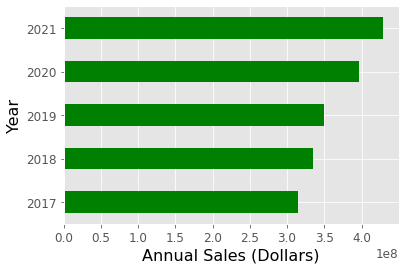

<Figure size 864x720 with 0 Axes>

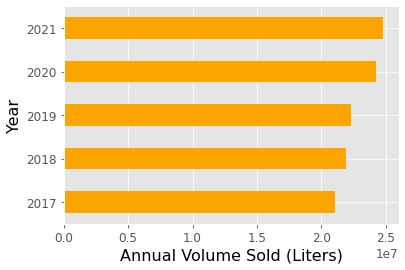

<Figure size 864x720 with 0 Axes>

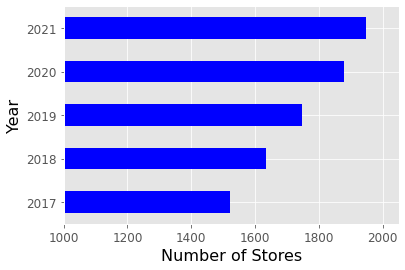

In [139]:
fig = plt.figure(figsize = (12,10))
temp.groupby(['Year']).agg({'Sale_Dollars':'sum'}).plot.barh(color = 'green')
plt.xlabel('Annual Sales (Dollars)',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig = plt.figure(figsize = (12,10))
temp.groupby('Year').agg({'VolumeSold_Liters':'sum'}).plot.barh(color = 'orange')
plt.xlabel('Annual Volume Sold (Liters)',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

fig = plt.figure(figsize = (12,10))
temp.groupby(['Year']).agg({'StoreID':'nunique'}).plot.barh(color='blue')
plt.xlabel('Number of Stores',fontsize=16, color = 'black')
plt.ylabel('Year', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)
plt.xlim(1000,2050)

(0.0, 3000000.0)

<Figure size 864x432 with 0 Axes>

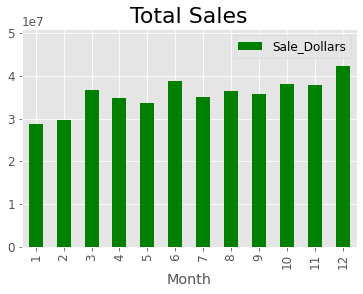

<Figure size 864x432 with 0 Axes>

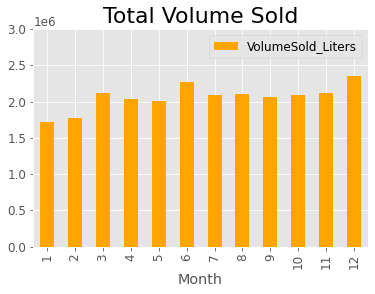

In [82]:
fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'}).plot.bar(color='green')
plt.title('Total Sales',fontsize=22, color = 'black')
plt.ylim(0,5.1e7)

fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['Month']).agg({'VolumeSold_Liters':'sum'}).plot.bar(color='orange')
plt.title('Total Volume Sold',fontsize=22, color = 'black')
plt.ylim(0,3e6)

(25000000.0, 45000000.0)

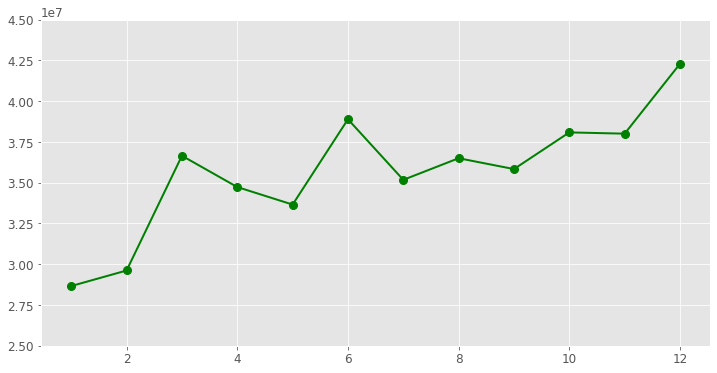

In [79]:
fig = plt.figure(figsize = (12,6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         temp[temp['Year']==2021].groupby(['Month']).agg({'Sale_Dollars':'sum'}), 
        color='green', marker='o', linewidth=2, markersize=8)
plt.ylim(2.5e7,4.5e7)

In [132]:
temp[temp['Year']==2021].groupby(['CategoryGroup']).agg({'Sale_Dollars':'sum'}).sort_values(by ='Sale_Dollars').nlargest(5, 'Sale_Dollars').sort_values(by ='Sale_Dollars')

,Sale_Dollars
CategoryGroup,
liqueur,2.966306e+07
tequila,3.507131e+07
rum,4.111186e+07
vodka,9.295745e+07
whisky,1.604921e+08


<Figure size 864x432 with 0 Axes>

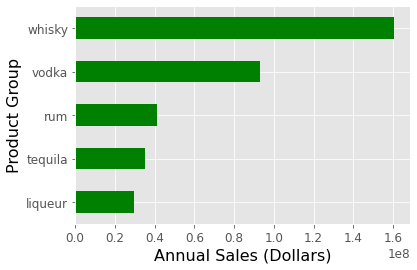

In [136]:
fig = plt.figure(figsize = (12,6))
temp[temp['Year']==2021].groupby(['CategoryGroup']).agg({'Sale_Dollars':'sum'}).sort_values(by ='Sale_Dollars').nlargest(5, 'Sale_Dollars').sort_values(by ='Sale_Dollars').plot.barh(color='green')
plt.xlabel('Annual Sales (Dollars)',fontsize=16, color = 'black')
plt.ylabel('Product Group', fontsize=16, color = 'black', rotation = 90)
plt.legend('',frameon=False)

Text(0.5, 1.0, 'Top Product Categories')

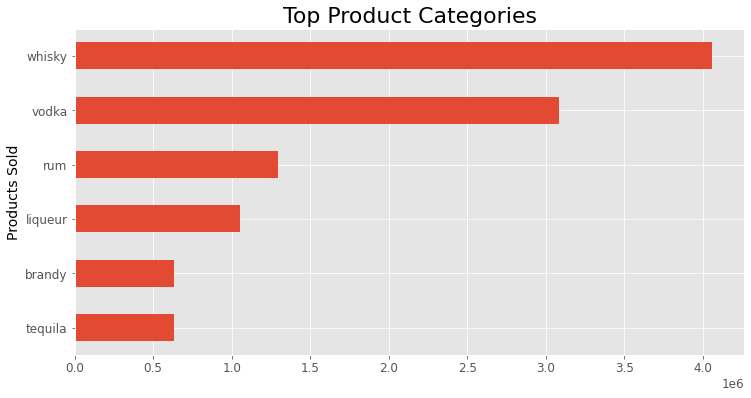

In [88]:
fig = plt.figure(figsize = (12,6))
temp.groupby('CategoryGroup').size().nlargest(6).sort_values(ascending=True).plot.barh()
plt.ylabel('Products Sold',fontsize=14, color = 'black')
plt.title('Top Product Categories',fontsize=22, color = 'black')

Text(0, 0.5, 'Product Sold')

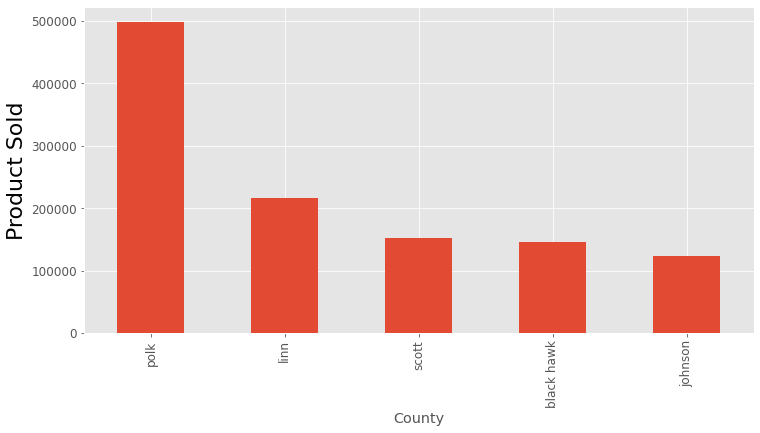

In [32]:
fig = plt.figure(figsize = (12,6))
temp.groupby('County').size().sort_values(ascending=False).nlargest(5).plot.bar()

plt.ylabel('Product Sold',fontsize=22, color = 'black')

In [115]:
temp[temp['Year']==2021].groupby(['County']).agg({'Sale_Dollars':'sum'})


,Sale_Dollars
County,
adair,683600.94
adams,215545.86
allamakee,1091295.24
appanoose,1107116.79
audubon,288076.35
benton,1630504.83
black hawk,23562357.61
boone,2354170.45
bremer,2499718.40
